In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Nov 20 20:10:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0    49W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/Wiki')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import img_to_array, load_img

In [ ]:
"""Load the first sample data and check it."""
print(wiki_data.loc[0])

path = "wiki_crop/"+ wiki_data.loc[0][0][2:-1]
img = load_img(path)
plt.imshow(img)
plt.show()

NameError: ignored

In [ ]:
filedata = open('wiki_processed_data.txt', 'r')
print('here')
images_list, age_list, gender_list = np.zeros((int(np.floor(57908*0.2)), 227, 227, 3), dtype=np.int16), [], []
print('here')

# for i in filedata:
#   fileName, age, gender = i.split(',')
#   fileName = fileName[2:-1]
  
#     filedata.remove(i)

# erroneuos_files = ['97/100097_1968-03-23_2010.jpg', '99/10004299_1908-08-19_1950.jpg', '97/100397_1902-01-09_2003.jpg', '98/10072598_1972-07-06_2009.jpg', '99/1007499_1983-03-09_2013.jpg']
erroneous_folders = ['97', '98', '99']
count = 0

for i in filedata:
  fileName, age, gender = i.split(',')
  fileName = fileName[2:-1]
  age = age[2:-1]
  gender = gender[2:-3]
  if fileName[0:2] not in erroneous_folders:
    # image = Image.open('wiki_crop/'+fileName)
    image = cv2.imread('wiki_crop/'+fileName)
    # print(np.array(image).shape)
    image = cv2.resize(image, (227, 227))
    # print(np.array(image).shape)
    image = np.array(image)
    if len(image.shape) == 3:
      images_list[count] = np.array(image)
      age_list.append(age)
      gender_list.append(gender)
      count += 1
  if count % 1000 == 0:
    print(count)
  if count == 11580:
    break


filedata.close()

here
here
1000
2000
3000
4000
5000
6000
7000
8000
8000
8000
9000
10000
11000
11000


In [ ]:
"""map the gender to class labels 0 and 1
and print first five records to check
"""

gender_list_np = np.zeros(len(gender_list))
# len(gender_list)
for i in range(len(gender_list)):
  if gender_list[i] == 'm':
    gender_list_np[i] = 1

In [ ]:
"""map the ages to class labels 0 to 7 for each age group
and print first 5 records to check
"""

age_list_np = np.zeros(len(age_list))
for i in range(len(age_list)):
  if age_list[i] == '4-6':
    age_list_np[i] = 1
  elif age_list[i] == '8-13':
    age_list_np[i] = 2
  elif age_list[i] == '15-20':
    age_list_np[i] = 3
  elif age_list[i] == '25-32':
    age_list_np[i] = 4
  elif age_list[i] == '38-43':
    age_list_np[i] = 5
  elif age_list[i] == '48-53':
    age_list_np[i] = 6
  elif age_list[i] == '60+':
    age_list_np[i] = 7


In [ ]:
%cd /content/drive/Shared drives/ECS289G Project/

with open('Wiki_X_images.npy', 'wb') as f:
  np.save(f, images_list)

# adience_gender_Y = adience_gender_Y.to_numpy()
with open('Wiki_gender_y.npy', 'wb') as f:
  np.save(f, gender_list_np)

# adience_age_Y = adience_age_Y.to_numpy()
with open('Wiki_age_y.npy', 'wb') as f:
  np.save(f, age_list_np)

/content/drive/Shared drives/ECS289G Project


In [ ]:
#Gender Wiki Dataset
i = images_list[:-1]
X = i
y = gender_list_np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))


# train_images = []
# test_images = []

# for row in X_train.iterrows():
#     image = Image.open(row[1].img_path)
#     image = image.resize((227, 227))   # Resize the image
#     data = np.asarray(image)
#     train_images.append(data)

# for row in X_test.iterrows():
#     image = Image.open(row[1].img_path)
#     image = image.resize((227, 227))  # Resize the image
#     data = np.asarray(image)
#     test_images.append(data)

# train_images = np.asarray(train_images)
# test_images = np.asarray(test_images)

#print('Train images shape {}'.format(train_images.shape))
#print('Test images shape {}'.format(test_images.shape))

In [ ]:
#y_train = np.asarray(y_train)
Y_train = y_train.reshape((8106, 1))
print('Train label shape {}'.format(Y_train.shape))
Y_test = y_test.reshape((3474, 1))
print('Test label shape {}'.format(Y_test.shape))

In [ ]:
z = age_list_np
a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(X, z, test_size=0.3, random_state=42)
print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

# UTK Dataset

In [1]:
from google.colab import drive

drive.mount('/content/drive/')

%cd /content/drive/Shared drives/ECS289G Project/UTK/UTKExtracted/UTKFace
# !ls


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/Shared drives/ECS289G Project/UTK/UTKExtracted/UTKFace


In [2]:
import os
files = os.listdir()
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 9675
28_0_1_20170113150754253.jpg.chip.jpg


In [3]:
import numpy as np
import cv2
images = np.zeros((9675,227,227,3))
ages = []
genders = []
for file in files:
    
    split_output = file.split('_')
    # print(split_output)
    ages.append(split_output[0])
    genders.append(int(split_output[1]))

In [12]:
# correct_genders = np.zeros(len(genders))
correct_genders = []
print(genders[0])
for i in range(len(genders)):
  if int(genders[i]) == 0:
    correct_genders.append(1)
  else:
    correct_genders.append(0)

len(correct_genders)

0


9675

In [13]:
%cd /content/drive/Shared drives/ECS289G Project/

correct_genders = np.array(correct_genders)
correct_genders.shape
with open('utk_gender.npy', 'wb') as f:
  np.save(f, correct_genders)

/content/drive/Shared drives/ECS289G Project


In [14]:
with open('utk_gender.npy', 'rb') as f:
  utk_gender = np.load(f)

utk_gender.shape

(9675,)

In [ ]:
processed_age = []
print(ages)
for i in ages:
  i=int(i)
  if i<=3:
    processed_age.append(0)
  elif i <= 7:
    processed_age.append(1)
  elif i <= 13:
    processed_age.append(2)
  elif i <= 22:
    processed_age.append(3)
  elif i <= 34:
    processed_age.append(4)
  elif i <= 45:
    processed_age.append(5)
  elif i <= 59:
    processed_age.append(6)
  else:
    processed_age.append(7)

print(processed_age)


['28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28

In [ ]:
count = 0
for file in files:
    image = cv2.imread(file)
    image = cv2.resize(image,dsize=(227,227))
    images[count] = np.asarray(image)
    # image = image.reshape((image.shape[0],image.shape[1],1))
    # images.append(image)
images.shape

(9675, 227, 227, 3)

In [ ]:
# import numpy as np
# # print(images[0])

# # image = np.array(images[0])
# np_images = np.zeros((len(images), 227, 227, 3))

# for i in range(len(images)):
#   np_images[i] = np.array(images[i])


# np_images.shape

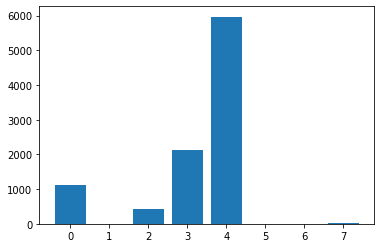

Max value: 29


In [ ]:
import matplotlib.pyplot as plt
x_ages = list(set(processed_age))
y_ages = [processed_age.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Max value:",max(ages))

In [ ]:
#images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(processed_age), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

TypeError: ignored

In [ ]:
#train_ages = ages.to_numpy()
train_ages = np.asarray(processed_age, dtype=np.float32)
print(train_ages.dtype)
train_gender = np.asarray(genders, dtype=np.float32)
print(train_gender.dtype)

float32
float32


In [ ]:
y_age = df['Ages']
y_gender = df['Genders']

print(y_age)

from sklearn.model_selection import train_test_split
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, y_gender, test_size=0.2, stratify=y_gender)

0       28
1       28
2       28
3       28
4       28
        ..
9670    15
9671    15
9672    15
9673    15
9674    15
Name: Ages, Length: 9675, dtype: object


ValueError: ignored

In [ ]:
%cd /content/drive/Shared drives/ECS289G Project/UTK/

with open('UTK_images.npy', 'wb') as f:
  np.save(f, images)
with open('UTK_gender.npy', 'wb') as f:
  np.save(f, train_gender)
with open('UTK_age.npy', 'wb') as f:
  np.save(f, train_ages)

/content/drive/Shared drives/ECS289G Project/UTK


# Adience Dataset Preprocessing

In [ ]:
# -*- coding: utf-8 -*-

import os
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/')

"""Import the necessary libraries for loading and viewing data"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data
fold0 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_0_data.txt",sep = "\t" )
fold1 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_1_data.txt",sep = "\t")
fold2 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_2_data.txt",sep = "\t")
fold3 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_3_data.txt",sep = "\t")
fold4 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_4_data.txt",sep = "\t")

"""Add the data from all those files into single pandas dataframe and print the shape and info about it."""

adience_data = pd.concat([fold0, fold1, fold2, fold3, fold4], ignore_index=True)
print(adience_data.shape)
adience_data.info()
adience_data.head()

(19370, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             19370 non-null  object
 1   original_image      19370 non-null  object
 2   face_id             19370 non-null  int64 
 3   age                 19370 non-null  object
 4   gender              18591 non-null  object
 5   x                   19370 non-null  int64 
 6   y                   19370 non-null  int64 
 7   dx                  19370 non-null  int64 
 8   dy                  19370 non-null  int64 
 9   tilt_ang            19370 non-null  int64 
 10  fiducial_yaw_angle  19370 non-null  int64 
 11  fiducial_score      19370 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


f    9372
m    8120
u    1099
Name: gender, dtype: int64


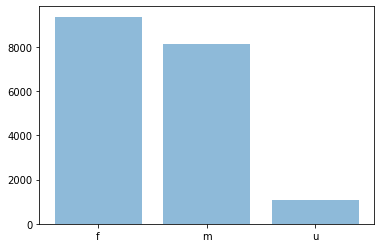

In [ ]:
"""plot a bar graph for gender values"""

#bar chart
gender = ['f','m','u']
print(adience_data.gender.value_counts())
plt.bar(gender, adience_data.gender.value_counts(), align='center', alpha=0.5)
plt.show()

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import img_to_array, load_img

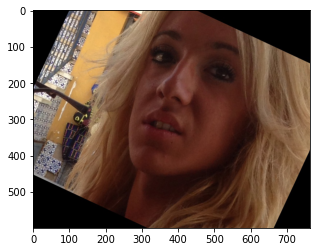

In [ ]:
path = "AdienceBenchmarkGenderAndAgeClassification/faces/"+adience_data.user_id.loc[0]+"/coarse_tilt_aligned_face."+str(adience_data.face_id.loc[0])+"."+adience_data.original_image.loc[0]
img = load_img(path)
plt.imshow(img)
plt.show()

In [ ]:
imp_data = adience_data[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()
imp_data.info()

img_path = []
for row in adience_data.iterrows():
    path = "AdienceBenchmarkGenderAndAgeClassification/faces/"+row[1].user_id+"/coarse_tilt_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    img_path.append(path)

imp_data['img_path'] = img_path
imp_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     19370 non-null  object
 1   gender  18591 non-null  object
 2   x       19370 non-null  int64 
 3   y       19370 non-null  int64 
 4   dx      19370 non-null  int64 
 5   dy      19370 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 908.1+ KB


,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",f,0,414,1086,1383,AdienceBenchmarkGenderAndAgeClassification/fac...
1,"(25, 32)",m,301,105,640,641,AdienceBenchmarkGenderAndAgeClassification/fac...
2,"(25, 32)",f,2395,876,771,771,AdienceBenchmarkGenderAndAgeClassification/fac...
3,"(25, 32)",m,752,1255,484,485,AdienceBenchmarkGenderAndAgeClassification/fac...
4,"(25, 32)",m,175,80,769,768,AdienceBenchmarkGenderAndAgeClassification/fac...


In [ ]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]

age_mapping_dict = {each[0]: each[1] for each in age_mapping}
drop_labels = []
for idx, each in enumerate(imp_data.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        imp_data.age.loc[idx] = age_mapping_dict[each]

imp_data = imp_data.drop(labels=drop_labels, axis=0) #droped None values
imp_data.age.value_counts(dropna=False)

imp_data = imp_data.dropna()
clean_data = imp_data[imp_data.gender != 'u'].copy()
clean_data.info()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 19345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       17452 non-null  object
 1   gender    17452 non-null  object
 2   x         17452 non-null  int64 
 3   y         17452 non-null  int64 
 4   dx        17452 non-null  int64 
 5   dy        17452 non-null  int64 
 6   img_path  17452 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


In [ ]:
gender_to_label_map = {
    'f' : 0,
    'm' : 1
}

clean_data['gender'] = clean_data['gender'].apply(lambda g: gender_to_label_map[g])
clean_data.head()


age_to_label_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}

clean_data['age'] = clean_data['age'].apply(lambda age: age_to_label_map[age])
clean_data.head()


,age,gender,x,y,dx,dy,img_path
0,4,0,0,414,1086,1383,AdienceBenchmarkGenderAndAgeClassification/fac...
1,4,1,301,105,640,641,AdienceBenchmarkGenderAndAgeClassification/fac...
2,4,0,2395,876,771,771,AdienceBenchmarkGenderAndAgeClassification/fac...
3,4,1,752,1255,484,485,AdienceBenchmarkGenderAndAgeClassification/fac...
4,4,1,175,80,769,768,AdienceBenchmarkGenderAndAgeClassification/fac...


In [ ]:
adience_X = clean_data[['img_path']]
adience_gender_Y = clean_data[['gender']]
adience_age_Y = clean_data[['age']]
#from sklearn.model_selection import train_test_split
#X_train, X_test, adience_g_Y_train, adience_g_Y_test = train_test_split(adience_X, adience_gender_Y, test_size=0.3, random_state=42)

#print('Train data shape {}'.format(X_train.shape))
#print('Test data shape {}'.format(X_test.shape))

adience_X_images = []
count = 0
#adience_X_test = []

for row in adience_X.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    adience_X_images.append(data)
    count += 1
    print(count)
    #if count % 1000 == 0:
    #  print(count)

#for row in X_test.iterrows():
#    image = Image.open(row[1].img_path)
#    image = image.resize((227, 227))  # Resize the image
#    data = np.asarray(image)
#    adience_X_test.append(data)

adience_X_images = np.asarray(adience_X_images)
#adience_X_test = np.asarray(adience_X_test)

#print('Train images shape {}'.format(adience_X_train.shape))
#print('Test images shape {}'.format(adience_X_test.shape))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


KeyboardInterrupt: ignored

In [ ]:
#Gender Adience Train Test Data split
from sklearn.model_selection import train_test_split
adience_X_train, adience_X_test, adience_g_Y_train, adience_g_Y_test = train_test_split(adience_X_images, adience_gender_Y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(adience_X_train.shape))
print('Train label shape {}'.format(adience_g_Y_train.shape))
print('Test data shape {}'.format(adience_X_test.shape))
print('Test label shape {}'.format(adience_g_Y_test.shape))

In [ ]:
#Age Adience Train Test Data split
adience_aX_train, adience_aX_test, adience_a_Y_train, adience_a_Y_test = train_test_split(adience_X_images, adience_age_Y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(adience_aX_train.shape))
print('Train label shape {}'.format(adience_a_Y_train.shape))
print('Test data shape {}'.format(adience_aX_test.shape))
print('Test label shape {}'.format(adience_a_Y_test.shape))

# Gender CNN Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import img_to_array, load_img

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/Shared drives/ECS289G Project/

with open('utk_images.npy', 'rb') as f:
  utk_images = np.load(f)
  

with open('utk_gender.npy', 'rb') as f:
  utk_gender = np.load(f)

with open('utk_age.npy', 'rb') as f:
   utk_age = np.load(f)

with open('Adience_age_y.npy', 'rb') as f:
   adience_age_y = np.load(f)

with open('Adience_gender_y.npy', 'rb') as f:
   adience_gender_y = np.load(f)

with open('Adience_X_images.npy', 'rb') as f:
   adience_X_images = np.load(f)

/content/drive/Shared drives/ECS289G Project


In [4]:
with open('Wiki_X_images.npy', 'rb') as f:
  wiki_X_images = np.load(f)

with open('Wiki_gender_y.npy', 'rb') as f:
  wiki_gender_y = np.load(f)

with open('Wiki_age_y.npy', 'rb') as f:
  wiki_age_y = np.load(f)

In [5]:
print(utk_images.shape)
utk_gender = utk_gender.reshape((9675,1))
print(utk_gender.shape)
utk_age = utk_age.reshape((9675,1))
print(utk_age.shape)
print(adience_X_images.shape)
print(adience_age_y.shape)
print(adience_gender_y.shape)
print(wiki_X_images.shape)
wiki_age_y = wiki_age_y.reshape((11580,1))
print(wiki_age_y.shape)
wiki_gender_y = wiki_gender_y.reshape((11580,1))
print(wiki_gender_y.shape)

(9675, 227, 227, 3)
(9675, 1)
(9675, 1)
(17452, 227, 227, 3)
(17452, 1)
(17452, 1)
(11581, 227, 227, 3)
(11580, 1)
(11580, 1)


In [6]:
# temp_images = np.concatenate((adience_X_images, utk_images), axis=0)
wiki_X_images = wiki_X_images[:-1]
wiki_X_images.shape

(11580, 227, 227, 3)

In [7]:
# temp_gender = np.concatenate((adience_gender_y, utk_gender), axis=0)
# temp_gender.shape

In [8]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(temp_images, temp_gender, test_size=0.3, random_state=42)

In [9]:
adience_g_Y_train = adience_g_Y_train.to_numpy()
adience_g_Y_test = adience_g_Y_test.to_numpy()

NameError: ignored

In [ ]:
#Gender compile datasets
#gender_X_train = []
# adience_X_train = np.asarray(adience_X_train, dtype=np.float32)
#print(adience_X_train.dtype)
#gender_X_train.append(adience_X_train)
#print("//")
# X_train = np.asarray(X_train, dtype=np.float32)
#print(X_train.dtype)
#gender_X_train.append(X_train)
#print("//")
# gender_X_train = np.append(adience_X_train, X_train)
#gender_X_train = np.asarray(gender_X_train, dtype=np.float32)
#print(gender_X_train.dtype)
#print("//")
# gender_train_X = tf.convert_to_tensor(gender_X_train)

# gender_Y_train = []
# #adience_g_Y_train = adience_g_Y_train.to_numpy()
# gender_Y_train.append(adience_g_Y_train)
# adience_g_Y_train = np.asarray(adience_g_Y_train, dtype=np.float32)
#print(adience_g_Y_train.dtype)
# gender_Y_train.append(Y_train)
# Y_train = np.asarray(Y_train, dtype=np.float32)
#print(Y_train.dtype)
# gender_Y_train = np.asarray(gender_Y_train)
# gender_Y_train = np.append(adience_g_Y_train, Y_train)
# gender_train_Y = tf.convert_to_tensor(gender_Y_train)
#print(gender_Y_train.dtype)
#print("//")

# gender_X_test = []
# gender_X_test.append(adience_X_test)
# adience_X_test = np.asarray(adience_X_test, dtype=np.float32)
#print(adience_X_test.dtype)
# gender_X_test.append(X_test)
# X_test = np.asarray(X_test, dtype=np.float32)
#print(X_test.dtype)
# gender_X_test = np.append(adience_X_test, X_test)
# gender_test_X = tf.convert_to_tensor(gender_X_test)
#print(gender_X_test.dtype)

# gender_Y_test = []
# #adience_g_Y_test = adience_g_Y_test.to_numpy()
# adience_g_Y_test = np.asarray(adience_g_Y_test, dtype=np.float32)
#print(adience_g_Y_test.dtype)
# gender_Y_test.append(adience_g_Y_test)
#gender_Y_test.append(Y_test)
# Y_test = np.asarray(Y_test, dtype=np.float32)
#print(Y_test.dtype)
# gender_Y_test = np.asarray(gender_Y_test, dtype=np.float32)
# gender_Y_test = np.append(adience_g_Y_test, Y_test)
# gender_test_Y = tf.convert_to_tensor(gender_Y_test)
#print(gender_Y_test.dtype)

In [10]:
image_names = dict()
image_names['UTK'] = utk_images
image_names['Adience'] = adience_X_images
image_names['Wiki'] = wiki_X_images

gender_names = dict()
gender_names['UTK'] = utk_gender
gender_names['Adience'] = adience_gender_y
gender_names['Wiki'] = wiki_gender_y

In [15]:
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=128, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=2, activation='softmax'))

model.summary()

#Train the model.

#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # Callback for earlystopping
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#history = model.fit(gender_train_X, gender_Y_train, batch_size=32, epochs=50, validation_data=(gender_X_test, gender_Y_test), callbacks=[callback])
for i in image_names.keys():
  X_train, X_test, y_train, y_test = train_test_split(image_names[i], gender_names[i], test_size=0.3, random_state=42)
  print(f'starting training on {i} dataset')
  history = model.fit(X_train, y_train, batch_size=1024, epochs=25, validation_data=(X_test, y_test))

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

model.save('gender_proper25_1e_4_1024.h5')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(test_acc)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 56, 56, 96)        14208     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 96)       0         
 2D)                                                             
                                                                 
 layer_normalization_4 (Laye  (None, 28, 28, 96)       192       
 rNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       307328    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 7s 716ms/step - loss: 0.6931 - accuracy: 0.5428 - val_loss: 0.6929 - val_accuracy: 0.5536
Epoch 2/25
7/7 [==============================] - 2s 324ms/step - loss: 0.6931 - accuracy: 0.5428 - val_loss: 0.6929 - val_accuracy: 0.5536
Epoch 3/25
7/7 [==============================] - 2s 323ms/step - loss: 0.6930 - accuracy: 0.5428 - val_loss: 0.6928 - val_accuracy: 0.5536
Epoch 4/25
7/7 [==============================] - 2s 320ms/step - loss: 0.6930 - accuracy: 0.5428 - val_loss: 0.6927 - val_accuracy: 0.5536
Epoch 5/25
7/7 [==============================] - 2s 320ms/step - loss: 0.6929 - accuracy: 0.5428 - val_loss: 0.6927 - val_accuracy: 0.5536
Epoch 6/25
7/7 [==============================] - 2s 326ms/step - loss: 0.6929 - accuracy: 0.5428 - val_loss: 0.6926 - val_accuracy: 0.5536
Epoch 7/25
7/7 [==============================] - 2s 329ms/step - loss: 0.6928 - accuracy: 0.5428 - val_loss: 0.6925 - val_accuracy: 0.5536
Epoch 8/25
7/7 [===============

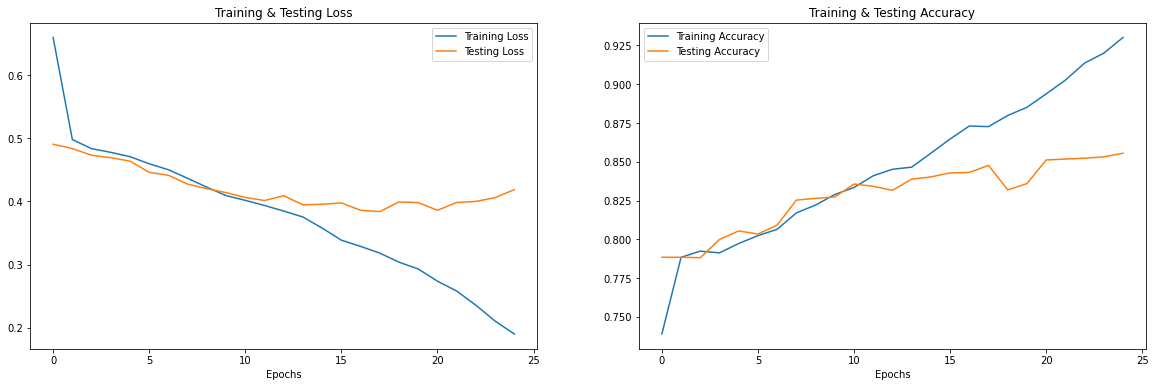

In [16]:
#print("Accuracy of our model on test data : " , Model.evaluate(x_test_scale, y_test_onehot)[1]*100 , "%")
# epochs = 50
epoch = 25

epochs = [i for i in range(epoch)] # epoch!
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

## Analyzing model on each of the datasets separately

Adience dataset

In [20]:
from sklearn.model_selection import train_test_split

AX_train, AX_test, Ay_train, Ay_test = train_test_split(adience_X_images, adience_gender_y, test_size=0.3, random_state=42)
history = model.fit(AX_train, Ay_train, batch_size=1024, epochs=25, validation_data=(AX_test, Ay_test))
model.save('gender_adience.h5')
test_loss_a, test_acc_a = model.evaluate(AX_test, Ay_test, verbose=2)
print(test_acc_a)

Epoch 1/25
12/12 [==============================] - 2s 198ms/step - loss: 0.6207 - accuracy: 0.6898 - val_loss: 0.5162 - val_accuracy: 0.7341
Epoch 2/25
12/12 [==============================] - 2s 163ms/step - loss: 0.4606 - accuracy: 0.7760 - val_loss: 0.4033 - val_accuracy: 0.8115
Epoch 3/25
12/12 [==============================] - 2s 163ms/step - loss: 0.3566 - accuracy: 0.8419 - val_loss: 0.3786 - val_accuracy: 0.8266
Epoch 4/25
12/12 [==============================] - 2s 169ms/step - loss: 0.2718 - accuracy: 0.8825 - val_loss: 0.3433 - val_accuracy: 0.8491
Epoch 5/25
12/12 [==============================] - 2s 165ms/step - loss: 0.2248 - accuracy: 0.9081 - val_loss: 0.3355 - val_accuracy: 0.8556
Epoch 6/25
12/12 [==============================] - 2s 164ms/step - loss: 0.1697 - accuracy: 0.9298 - val_loss: 0.3238 - val_accuracy: 0.8655
Epoch 7/25
12/12 [==============================] - 2s 163ms/step - loss: 0.1506 - accuracy: 0.9400 - val_loss: 0.3125 - val_accuracy: 0.8699
Epoch 

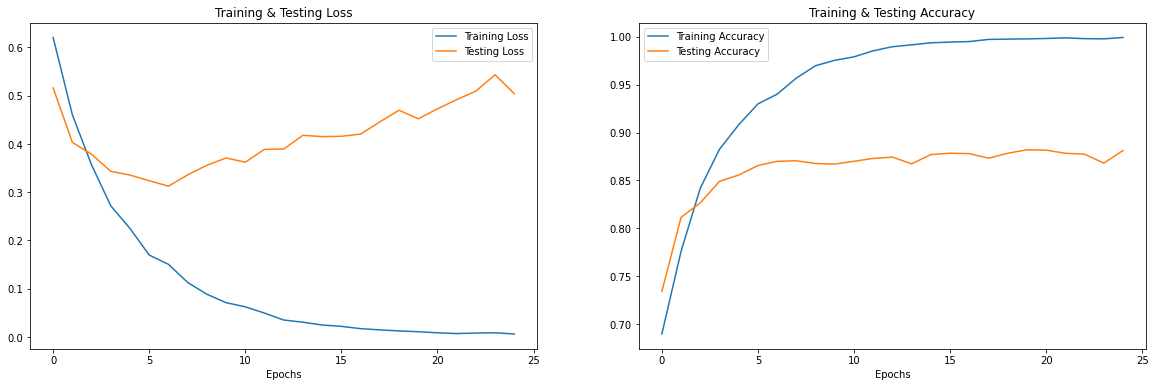

In [21]:
epoch = 25

epochs = [i for i in range(epoch)] # epoch!
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# Age CNN Model

In [22]:
image_names = dict()
image_names['UTK'] = utk_images
image_names['Adience'] = adience_X_images
image_names['Wiki'] = wiki_X_images

age_names = dict()
age_names['UTK'] = utk_age
age_names['Adience'] = adience_age_y
age_names['Wiki'] = wiki_age_y

In [30]:
model2 = Sequential()
model2.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(LayerNormalization())
model2.add(Conv2D(filters=128, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(LayerNormalization())
model2.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(LayerNormalization())
model2.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(LayerNormalization())

model2.add(Flatten())
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(rate=0.25))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(rate=0.25))
model2.add(Dense(units=8, activation='softmax'))



model2.summary()

#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # Callback for earlystopping
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#history = model.fit(train_images, y_train, batch_size=32, epochs=50, validation_data=(test_images, y_test), callbacks=[callback])
for i in image_names.keys():
  X_train, X_test, y_train, y_test = train_test_split(image_names[i], age_names[i], test_size=0.3, random_state=42)
  print(f'starting training on {i} dataset')
  history = model2.fit(X_train, y_train, batch_size=1024, epochs=25, validation_data=(X_test, y_test))

model.save('age_model25_again.h5')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 56, 56, 96)        14208     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 28, 28, 96)       0         
 g2D)                                                            
                                                                 
 layer_normalization_28 (Lay  (None, 28, 28, 96)       192       
 erNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 128)       307328    
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 6s 637ms/step - loss: 2.0791 - accuracy: 0.2426 - val_loss: 2.0786 - val_accuracy: 0.6145
Epoch 2/25
7/7 [==============================] - 2s 319ms/step - loss: 2.0783 - accuracy: 0.6175 - val_loss: 2.0778 - val_accuracy: 0.6145
Epoch 3/25
7/7 [==============================] - 2s 318ms/step - loss: 2.0775 - accuracy: 0.6175 - val_loss: 2.0770 - val_accuracy: 0.6145
Epoch 4/25
7/7 [==============================] - 2s 322ms/step - loss: 2.0767 - accuracy: 0.6175 - val_loss: 2.0762 - val_accuracy: 0.6145
Epoch 5/25
7/7 [==============================] - 2s 319ms/step - loss: 2.0759 - accuracy: 0.6175 - val_loss: 2.0753 - val_accuracy: 0.6145
Epoch 6/25
7/7 [==============================] - 2s 319ms/step - loss: 2.0751 - accuracy: 0.6175 - val_loss: 2.0745 - val_accuracy: 0.6145
Epoch 7/25
7/7 [==============================] - 2s 322ms/step - loss: 2.0742 - accuracy: 0.6175 - val_loss: 2.0737 - val_accuracy: 0.6145
Epoch 8/25
7/7 [===============

In [31]:
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=2)
print(test_acc)

109/109 - 1s - loss: 1.3855 - accuracy: 0.4511 - 674ms/epoch - 6ms/step
0.4510650634765625


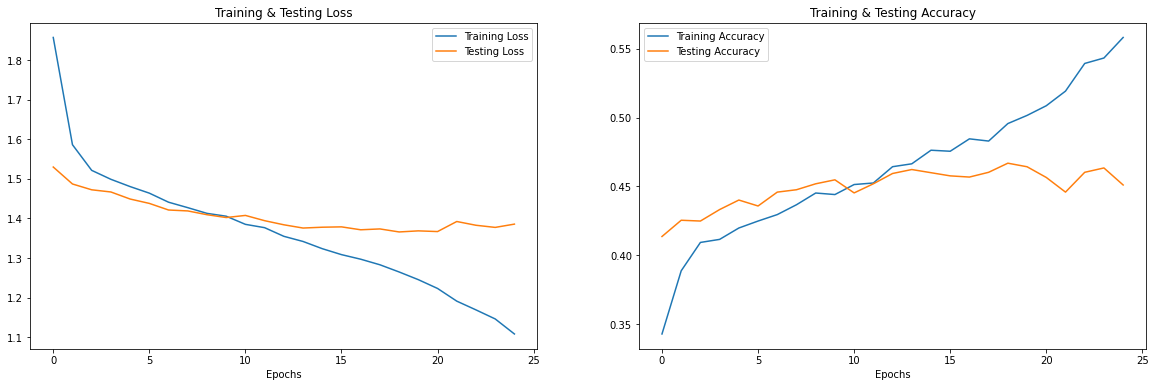

In [32]:
epoch = 25

epochs = [i for i in range(epoch)] # epoch!
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()